# <center>Proyecto 2</center>
<center><b>Modelación y Simulación</b></center>
<center>Javier Anleu Alegría - 17149</center>

<center>Andrea Argüello - 17801</center>

## Problema a resolver
Los sistemas de control difusos (o _fuzzy_ en inglés) son sistemas de control basados en lógica difusa, tomando valores de entrada que pueden tomar un valor continuo entre 0 y 1, en contraste a la lógica digital clásica que opera con valores discretos, ya sea 0 o 1. Estos sistemas son bastante comunes en el uso de máquinas, a traves del uso de controladores en los cuales dicha lógica es programada. 

En particular, las estrategias para sistemas de control difuso son más empíricas, ya que las mismas vienen de experiencia más que de modelos matemáticos, y en muchos casos involucran un alto número de entradas, por lo cual tener un sistema bien definido de reglas es imperativo.

En experiencia personal, se ha logrado observar el funcionamiento de estos en ventiladores de cuartos de servidores, los cuales al detectar una elevación mínima en la temperatura se activan para enfriar el cuarto nuevamente. A pesar de no conocer el sistema, se puede asumir que utiliza un controlador de lógica difusa.

Otras aplicaciones menos convencionales que pueden mencionarse son el uso de lógica difusa para el diseño interactivo de un espacio arquitectónico basado en estética, realizado por Asma Naz y Mihai Nadin (2018).


## Aplicación
Ben Ali, Aridhi, Abbes y Mami (2016) desarrollaron un controlador de lógica difusa para regular la temperatura y humedad relativa dentro de un invernadero de agricultura, la cual se modeló en Matlab-Simulink. El controlador consiste en dos controladores más simples trabajando en conjunto. 

A continuación, se simulará el controlador de temperatura y humedad relativa descrita por Ben Ali *et al.* (2016). Las entradas del sistema son la temperatura y humedad relativa, definidas como:
$$\Delta T = T_{setpoint} - T_{inside}$$
$$\Delta H = H_{setpoint} - H_{inside}$$

Durante el día, la temperatura ideal es $T_{setpoint} = 24 ^{\circ} C$ y la humedad ideal es $H_{setpoint} = 70\%$. Las salidas del sistema son la razón de ventilación, calentamiento, humidificación, y deshumidificación. En este caso se demuestra una de las ventajas de los sistemas de lógica difusa, ya que se puede implementar un sistema con más consecuentes que antecedentes de manera simple.
## Implementación

### Librerías a utilizar

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Definición de variables *fuzzy* para el control de temperatura

**Definición de la variable de ingreso:** `Temperature Error`

In [2]:
errT = ctrl.Antecedent(np.arange(-10, 10, 0.01), 'Temperature Error')

**Definición de cláusulas para `Humidity Error`:**

In [3]:
errT['Negative Big'] = fuzz.trimf(errT.universe, [-10,-5,-0.75])
errT['Negative Medium'] = fuzz.trimf(errT.universe, [-1.25,-1,-0.25])
errT['Zero'] = fuzz.trimf(errT.universe, [-0.5,0,0.5])
errT['Positive Medium'] = fuzz.trimf(errT.universe, [0.25,1,1.25])
errT['Positive Big'] = fuzz.trimf(errT.universe, [0.75,6,10])

**Definición de la variable de salida:** `Ventilation`

In [4]:
vent = ctrl.Consequent(np.arange(0, 3.5, 0.01), 'Ventilation')

**Definición de cláusulas para `Ventilation`:**

In [5]:
vent['Zero'] = fuzz.trapmf(vent.universe, [0,0,0.1,0.3])
vent['Medium'] = fuzz.trapmf(vent.universe, [0,0.25,0.9,1.1])
vent['High'] = fuzz.trapmf(vent.universe, [0.7,1.6,3.5,3.5])

**Definición de la variable de salida:** `Heater`

In [6]:
heat = ctrl.Consequent(np.arange(0, 500, 1), 'Heater')

**Definición de cláusulas para `Heater`:**

In [7]:
heat['Zero'] = fuzz.trapmf(heat.universe, [0,0,3,10])
heat['Medium'] = fuzz.trapmf(heat.universe, [0,40,210,250])
heat['High'] = fuzz.trapmf(heat.universe, [230,260,500,500])

**Visualización de las variables con sus cláusulas:**

/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


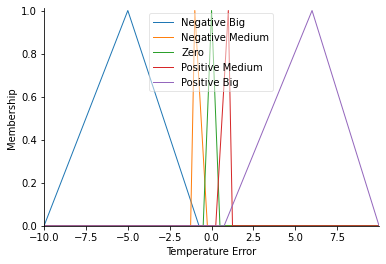

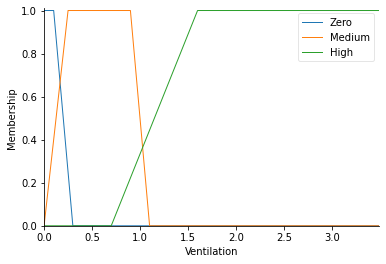

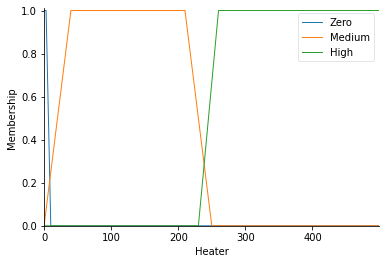

In [8]:
errT.view()
vent.view()
heat.view()

### Definición de reglas *fuzzy* para el control de temperatura

In [9]:
# Reglas
r1 = ctrl.Rule(errT['Negative Big'], (vent['High'], heat['Zero']))
r2 = ctrl.Rule(errT['Negative Medium'], (vent['Medium'], heat['Zero']))
r3 = ctrl.Rule(errT['Zero'], (vent['Zero'], heat['Zero']))
r4 = ctrl.Rule(errT['Positive Medium'], (vent['Zero'], heat['Medium']))
r5 = ctrl.Rule(errT['Positive Big'], (vent['Zero'], heat['High']))

temperature_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
temperature = ctrl.ControlSystemSimulation(temperature_ctrl)

### Prueba de ejecución del sistema

Para corroborar la funcionalidad del sistema, se le darán al sistema dos valores para $\Delta T$:

$${\Delta T}_1 = 7$$
$${\Delta T}_2 = -5$$

y se mostrarán los valores obtenidos para las variables de salida `Ventilation` y `Heater`.

0.1166666666666667 370.0431619786615


/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


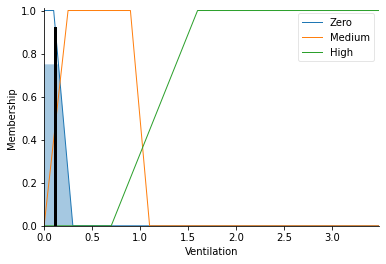

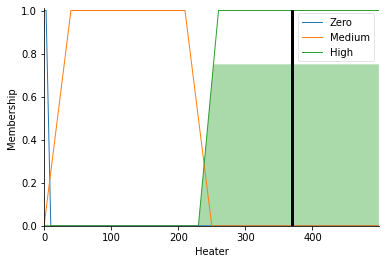

In [10]:
temperature.input['Temperature Error'] = 7
temperature.compute()
print(temperature.output['Ventilation'], temperature.output['Heater'])
vent.view(sim=temperature)
heat.view(sim=temperature)

2.3055769230769116 3.5641025641026096


/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


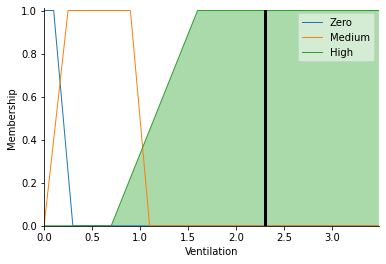

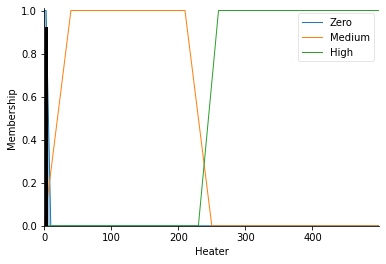

In [11]:
temperature.input['Temperature Error'] = -5
temperature.compute()
print(temperature.output['Ventilation'], temperature.output['Heater'])
vent.view(sim=temperature)
heat.view(sim=temperature)

### Definición de variables *fuzzy* para el control de humedad

**Definición de la variable de ingreso:** `Humidity Error`

In [12]:
errH = ctrl.Antecedent(np.arange(-50, 51, 1), 'Humidity Error')

**Definición de cláusulas para `Humidity Error`:**

In [13]:
errH['Negative Big'] = fuzz.trapmf(errH.universe, [-50,-50,-40,-20])
errH['Negative Medium'] = fuzz.trapmf(errH.universe, [-27,-21,-14,-2])
errH['Zero'] = fuzz.trimf(errH.universe, [-9,0,9])
errH['Positive Medium'] = fuzz.trapmf(errH.universe, [4,10,17,27])
errH['Positive Big'] = fuzz.trapmf(errH.universe, [21,41,50,50])

**Definición de la variable de salida:** `Humidifying`

In [14]:
hum = ctrl.Consequent(np.arange(0, 51, 1), 'Humidifying')

**Definición de cláusulas para `Humidifying`:**

In [15]:
hum['Zero'] = fuzz.trapmf(hum.universe, [0,0,2,8])
hum['Medium'] = fuzz.trapmf(hum.universe, [4,7,25,32])
hum['High'] = fuzz.trapmf(hum.universe, [26,35,50,50])

**Definición de la variable de salida:** `Dehumidifying`

In [16]:
deh = ctrl.Consequent(np.arange(0, 51, 1), 'Dehumidifying')

**Definición de cláusulas para `Humidity Error`:**

In [17]:
deh['Zero'] = fuzz.trapmf(deh.universe, [0,0,3,8])
deh['Medium'] = fuzz.trapmf(deh.universe, [4,10,26,32])
deh['High'] = fuzz.trapmf(deh.universe, [26,35,50,50])

**Visualización de las variables con sus cláusulas:**

/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


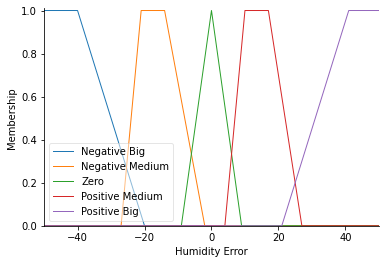

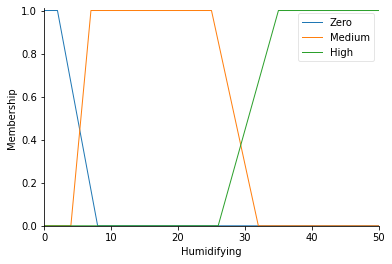

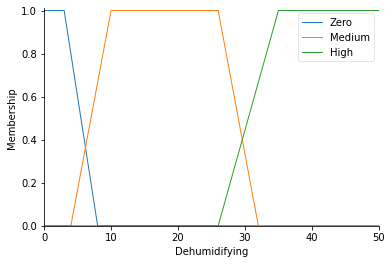

In [18]:
errH.view()
hum.view()
deh.view()

### Definición de reglas *fuzzy* para el control de humedad

In [19]:
# Reglas
r1 = ctrl.Rule(errH['Negative Big'], (hum['Zero'], deh['High']))
r2 = ctrl.Rule(errH['Negative Medium'], (hum['Zero'], deh['Medium']))
r3 = ctrl.Rule(errH['Zero'], (hum['Zero'], deh['Zero']))
r4 = ctrl.Rule(errH['Positive Medium'], (hum['Medium'], deh['Zero']))
r5 = ctrl.Rule(errH['Positive Big'], (hum['High'], deh['Zero']))

humidity_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
humidity = ctrl.ControlSystemSimulation(humidity_ctrl)

### Prueba de ejecución del sistema

Para corroborar la funcionalidad del sistema, se le darán al sistema dos valores para $\Delta H$:

$${\Delta H}_1 = 20$$
$${\Delta H}_2 = -25$$

y se mostrarán los valores obtenidos para las variables de salida `Humidifying` y `Dehumidifying`.

17.333333333333336 3.206666666666668


/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


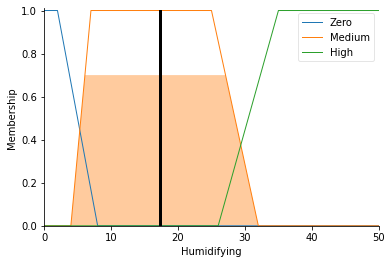

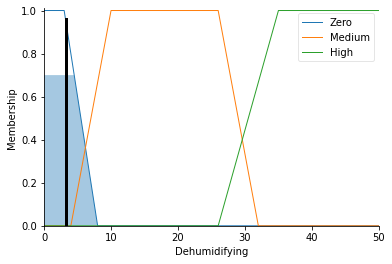

In [20]:
humidity.input['Humidity Error'] = 20
humidity.compute()
print(humidity.output['Humidifying'], humidity.output['Dehumidifying'])
hum.view(sim=humidity)
deh.view(sim=humidity)

3.5238095238095233 25.947040498442377


/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


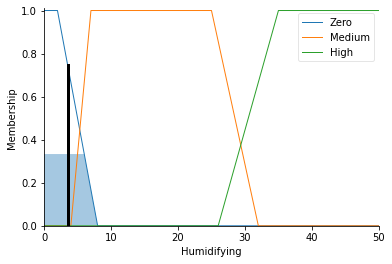

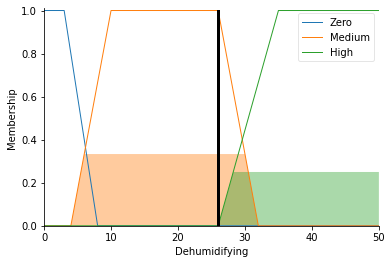

In [21]:
humidity.input['Humidity Error'] = -25
humidity.compute()
print(humidity.output['Humidifying'], humidity.output['Dehumidifying'])
hum.view(sim=humidity)
deh.view(sim=humidity)

## Ejecución del modelo con ambos controladores

Para demostrar la funcionalidad del modelo, se le proveerá un valor de $\Delta T$ y un valor de $\Delta H$ y se mostrará su respuesta para ajustar la temperatura y humedad del invernadero:

$$\Delta T = 11$$
$$\Delta H= -12$$

Ventilación: 0.10833333333333774 
Calefacción: 371.8523622047217 
Humidificación: 2.9393939393939394 
Deshumidificación: 17.999999999999993


/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


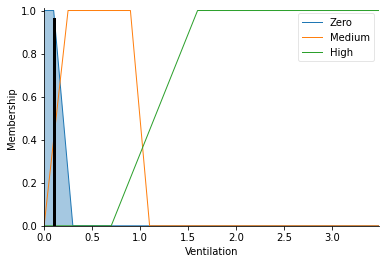

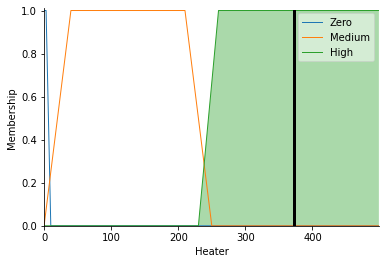

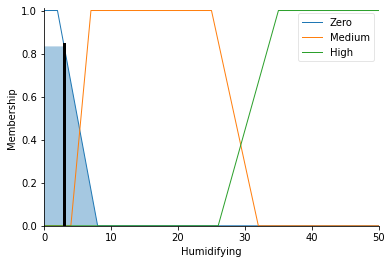

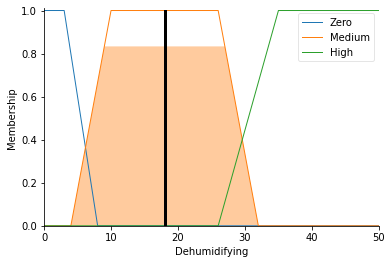

In [22]:
temperature.input['Temperature Error'] = 6
temperature.compute()
humidity.input['Humidity Error'] = -12
humidity.compute()
print("Ventilación:",temperature.output['Ventilation'],"\nCalefacción:", 
      temperature.output['Heater'],"\nHumidificación:", 
      humidity.output['Humidifying'],"\nDeshumidificación:", humidity.output['Dehumidifying'])
vent.view(sim=temperature)
heat.view(sim=temperature)
hum.view(sim=humidity)
deh.view(sim=humidity)

## Discusión de resultados

Por medio de la librería `skfuzzy`, fue posible implementar el controlador de temperatura y humedad de invernadero descrito en (Bad Ali, *et al.*, 2016). El modelo generado produce salidas de ventilación, calentamiento, humidificación y deshumidificación que coinciden con las reglas descritas a partir de las diferencias de temperatura y humedad, y su ejecución es computacionalmente eficiente. 

La librería `skfuzzy` de Python es una herramienta bastante útil para la implementación de lógica difusa en la programación de controladores. Sin embargo, un elemento que no está considerado en la implementación del controlador es el efecto que sus propias variables tendrían en el invernadero. Para que esto funcione, el controlador debe tener una retroalimentación constante del sistema, pero debido a la discretización de las variables, es posible que los cambios efectuados en él sean más severos o más leves de lo anticipado originalmente y por lo tanto le sea difícil regular la temperatura y humedad únicamente a través de estos parámetros. 

En el artículo de Ben Ali *et al.* (2016), se realizaron simulaciones utilizando Matlab, donde se modelaba el sistema termodinámico del invernadero con y sin controlador. Utilizando este modelo, sería posible intentar predecir los efectos que tendrán los ajustes del controlador en el invernadero. Comparando los valores predichos con los obtenidos en el invernadero por un período de tiempo, sería posible generar un conjunto de reglas por medio de un modelo de inteligencia artificial (como redes neuronales o algoritmos genéticos), el cual podría resultar en un mejor rendimiento del controlador. El controlador propuesto en el artículo trabaja con el sistema de inferencia de lógica difusa de Mamdani, pero al incluir un conjunto de reglas más riguroso y específico a partir de mediciones del impacto del controlador en el invernadero, sería posible obtener un sistema más sofisticado que siga el modelo de inferencia de Takagi-Sugeno. 

## Conclusiones

Se implementó un modelo de inferencia de lógica difusa para controlar la temperatura y humedad en invernaderos por medio de la librería `skfuzzy`.

## Referencias
1. Ben Ali, R., Aridhi, E., Abbes, M. y Mami, A. (2016). _Fuzzy Logic Controller of temperature and humidity inside an agricultural greenhouse_. DOI: 10.1109/IREC.2016.7478929
2. Gafa, C. (2020). A very brief introduction to Fuzzy Logic and Fuzzy Systems. _Towards Data Science_. Recuperado de https://towardsdatascience.com/a-very-brief-introduction-to-fuzzy-logic-and-fuzzy-systems-d68d14b3a3b8
3. Naz, A. y Nadin, M. (2018). Application of Fuzzy Lofic in Desin of an Aesthetics-Based Interactive Architectural Space. _International Journal of Applied Research on Information Technology and Computing_. DOI: 10.5958/0975-8089.2018.00012.X